**0. Import the data and declare your package dependencies.**

In [31]:
#libraries
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, theme, element_text, labs


In [2]:
#data
avocado = pd.read_csv('data/avocado-updated-2020.csv')

**1. Briefly describe the data set. What information does it contain?**

In [ ]:
# "The dataset features historical data on avocado prices and sales volume in multiple cities, states, and regions of the USA" 
# "Contains data from 4 January 2015 up to 17 May 2020"
# - Kaggle

**2. Clean the data in any way you see fit.**

In [9]:
#data manipulation
#long_avocado = avocado.melt(id_vars=["total_volume"], value_vars=["small_bags", "large_bags", "xlarge_bags"], 
                            #var_name="bag_type", value_name="bag_volume")



# converts the string to date format
avocado['date'] = pd.to_datetime(avocado['date'])

#split date to 3 variables
avocado['year'] = avocado['date'].dt.year
avocado['month'] = avocado['date'].dt.month
avocado['day'] = avocado['date'].dt.day


**Exercises**

**3. Which major geographical region sold the most total organic, small Hass avocados in 2017?**


In [ ]:
#select only the organic observations in the year 2017
organic = avocado[(avocado["type"] == "organic") & (avocado["year"] == 2017)]

#stores small_bags grouped by geography. gets the max and then sorts
#refrenced chat GPT
organic.groupby("geography")["small_bags"].max().sort_values(ascending=False)

#the northeast region is the most at 238752.11 small bags

**4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?**

In [27]:
#split the variables in the data cleaning step

#stores total_volume grouped by month. gets the max and then sorts
avocado.groupby("month")["total_volume"].max().sort_values(ascending=False)

#month 5 is the highest average volume of avocado sales (6371644.15)

month
5     63716144.15
2     63428864.75
7     55608056.70
6     55007945.00
4     52015534.19
8     51973374.00
3     51540125.03
9     51000908.97
1     48534972.05
10    46520087.91
11    45167049.45
12    39683131.73
Name: total_volume, dtype: float64

**5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.**

In [ ]:
#stores total_volume grouped by geography. gets the max and then sorts
avocado.groupby("geography")["total_volume"].max().sort_values(ascending=False)

#California sold the most total avocados (63716144.15)

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


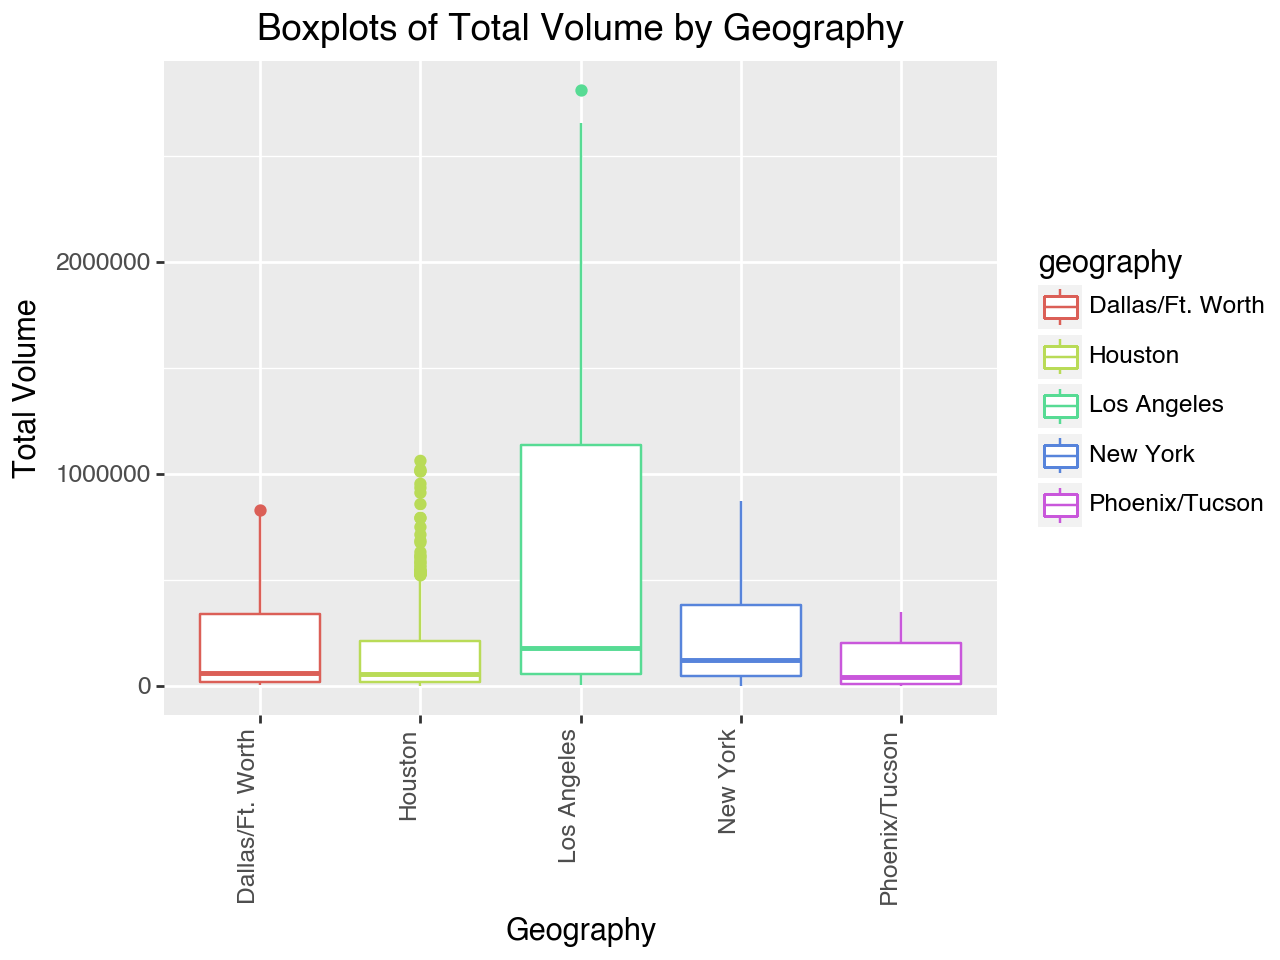

In [35]:
#top 5 metro geographical regions:
# los angeles
# new york
# houston
# pheonix 
# dallas
#filter data to only include those 5 regions
top_5 = avocado[(avocado["geography"] == "Los Angeles") | (avocado["geography"] == "New York") | (avocado["geography"] == "Houston") | (avocado["geography"] == "Phoenix/Tucson") | (avocado["geography"] == "Dallas/Ft. Worth")]

#side-by-side box plot
plot = (
    ggplot(top_5, aes(x='geography', y='small_bags', color = 'geography')) +
    geom_boxplot() +
    theme(axis_text_x=element_text(angle=90, hjust=1)) +
    labs(title='Boxplots of Total Volume by Geography', x='Geography', y='Total Volume')
)

**Pivoting?**

**6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.**

**7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.**

**8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.**